## Learning Pandas and Matplotlib

Pandas is Pythons library that enables broad possibilities for data analysis.
By using Pandas it is very easy to upload, manage and analyse data from different tables by using SQL-like commands. Moreover, in connection with the libraries Matplotlib and Seaborn, Pandas gives broad possibilites to visualise the data.

In [2]:
#First import the libraries/packages we need
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import rcParams

from utils.formating import format_title_string

rcParams["figure.figsize"] = 8, 5
import seaborn as sns

from utils.formating import format_title_string

We study the main methods of Pandas and Matplotlib packages by working with the dataset that describes the churn rate of the customers of a telecom company. 

<b>Exercise 1:</b>

Read the data from the file "telecom_churn.csv" and display the first 5 rows by using the method "head". <b> Hint :</b> The method read_csv can be useful

In [3]:
### Write Your code here ###
table = pd.read_csv("./telecom_churn.csv")
print(table.head());

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

<b>Exercise 2:</b>

Display the size of the data array, information about it, and its main statistical characteristics. <b>Hint:</b> use methods shape, info, describe.

In [4]:
### Write Your code here ###
print(format_title_string("describe method", 50))
print(table.describe())

print(format_title_string("shape field", 50))
print(table.shape)

print(format_title_string("info method", 50))
print(table.info())


--------------------------------------------------
----------------- describe method -----------------
--------------------------------------------------

       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000    

<b>Exercise 3:

</b>Convert the column "Churn" to the int64 type. <b> Hint:</b> use the astype method 

Plot the distribution of the churn and  loyal clients in the bar plot. The figure should look like this:

<img src="dist_churn.png">

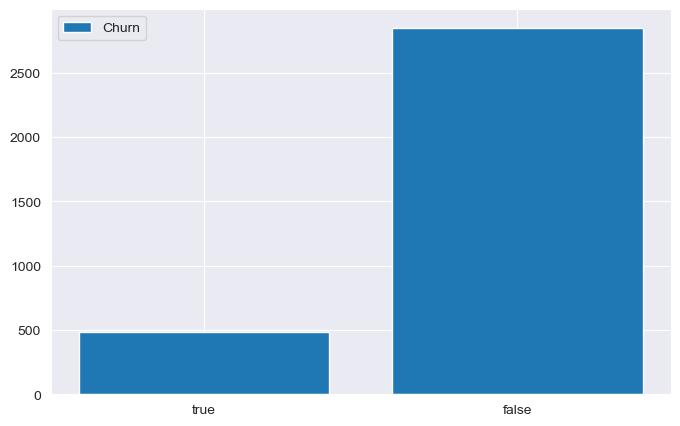

In [5]:
### Write Your code here ###
table["Churn"] = table["Churn"].astype("int64")
plt.bar(["true", "false"], [table["Churn"].sum(), len(table["Churn"]) - table["Churn"].sum()])
plt.legend(["Churn"])
plt.show()

### Sorting

<b>Exercise 4:</b>

Sort the dataframe you have obtained in exercise 3 by the value in "Total day charge" in descending/ascending order.
Also sort it by using the column "Churn" as the primary key and "Total eve calls" as the secondary key. Try different combinations of ordering. 

<b> Hint:</b> use the method sort_values

In [6]:
### Write Your code here ###
print(format_title_string("Total day charge ascending", 50))
print(table.sort_values(by=["Total day charge"], ascending=True))

print(format_title_string("Total day charge descending", 50))
print(table.sort_values(by=["Total day charge"], ascending=False))

print(format_title_string("Churn and Total eve calls ascending", 50))
print(table.sort_values(by=["Churn", "Total eve calls"], ascending=True))

print(format_title_string("Total eve calls and Churn ascending", 50))
print(table.sort_values(by=["Total eve calls", "Churn"], ascending=True))


--------------------------------------------------
------------ Total day charge ascending ------------
--------------------------------------------------

     State  Account length  Area code International plan Voice mail plan  \
1345    SD              98        415                 No              No   
1397    VT             101        510                 No              No   
2736    OK             127        510                 No             Yes   
2753    OH             134        415                 No              No   
1986    WI              70        415                 No              No   
...    ...             ...        ...                ...             ...   
605     MO             112        415                 No              No   
156     OH              83        415                 No              No   
2594    OH             115        510                Yes              No   
985     NY              64        415                Yes              No   
365     

### Indexing and extracting information from the dataframe

By using Pandas dataframes we are able to index and extract information from the dataset. You can index the information stored in dataframe either by names or by indices. In the first case you use the command loc, in the second iloc. 

<b> Hint: </b> Use logical indexing for the columns and the groupby method to solve the tasks.

<b>Exercise 5:</b>
* Display the mean churn rate of the clients.
* Now we want to analyse statistical information only for the clients, which are or aren"t loyal to their telecom-company (field "Churn" in dataframe). Extract the loyal and non-loyal clients from the table separately and display the means of their charateristics in a single dataframe.
* How long do the non-loyal users talk during the day (on average)?
* What is the maximum length of the international calls for the loyal users that do not use the international plan?

In [7]:
### Write Your code here ###

# To use mean we should first get rid of yes/no tables
table["International plan"] = table["International plan"].map({"No": 0, "Yes": 1, 0: 0, 1: 1}).astype("int64")
table["Voice mail plan"] = table["Voice mail plan"].map({"No": 0, "Yes": 1, 0: 0, 1: 1}).astype("int64")

print(format_title_string("Mean churn rate of the clients", 50))
print(table["Churn"].mean())

print(format_title_string("Means of loyal and not loyal clients", 50))
print(table.drop(columns="State").groupby(["Churn"]).mean())

print(format_title_string("Average of non-loyal during day talk time", 50))
print(table.drop(columns="State")[table["Churn"] == 0]["Total day minutes"].mean())

print(format_title_string("Max length of calls without international plan", 50))
print(table.drop(columns="State")[table["International plan"] == 0]["Account length"].max())

--------------------------------------------------
---------- Mean churn rate of the clients ----------
--------------------------------------------------

0.14491449144914492
--------------------------------------------------
------- Means of loyal and not loyal clients -------
--------------------------------------------------

       Account length   Area code  International plan  Voice mail plan  \
Churn                                                                    
0          100.793684  437.074737            0.065263         0.295439   
1          102.664596  437.817805            0.283644         0.165631   

       Number vmail messages  Total day minutes  Total day calls  \
Churn                                                              
0                   8.604561         175.175754       100.283158   
1                   5.115942         206.914079       101.335404   

       Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
Churn            

### Distribution of the features

<b>Exercise 6:</b>

Plot the distribution of the features that have numerical values. 

<b> Hint: </b>use the method hist which can also be applied from the pandas dataframe. It should look like that:
<img src="hist_feat.png">

What do you observe? From which probability distribution could each feature be generated?

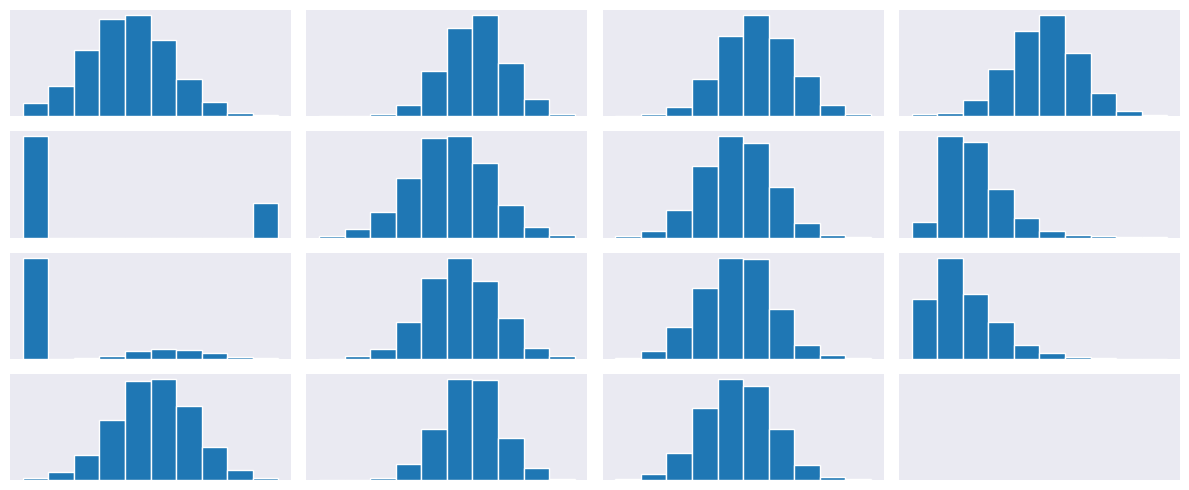

In [21]:
### Write Your code here ###
fig, axs = plt.subplots(4, 4, figsize=(12, 5))
axs[0, 0].hist(table["Account length"])
axs[1, 0].hist(table["Area code"])
axs[2, 0].hist(table["Number vmail messages"])
axs[3, 0].hist(table["Total day minutes"])
axs[0, 1].hist(table["Total day calls"])
axs[1, 1].hist(table["Total day charge"])
axs[2, 1].hist(table["Total eve minutes"])
axs[3, 1].hist(table["Total eve calls"])
axs[0, 2].hist(table["Total eve charge"])
axs[1, 2].hist(table["Total night minutes"])
axs[2, 2].hist(table["Total night calls"])
axs[3, 2].hist(table["Total night charge"])
axs[0, 3].hist(table["Total intl minutes"])
axs[1, 3].hist(table["Total intl calls"])
axs[2, 3].hist(table["Customer service calls"])

for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

plt.tight_layout()
plt.show()

p### Pivot tables and graphics

We want to see how the instances are distributed between two categories: "International plan" and "Churn". 

<b>Exercise 7:</b>
* Build the cross table between the features using the method <i>crosstab</i>.
* Visualize the distribution for the feature "Churn", depending on the value of the features "International plan", "Voice mail plan", and "Customer service calls".
<b>Hint:</b> Use commands plt.sublot and sns.subplots.

Your plot should look something like this:
<img src="dist_crosstab.png">

What do you see? What conclusions can be drawn? What feature (intuitively) can be more important for Churn prediction?

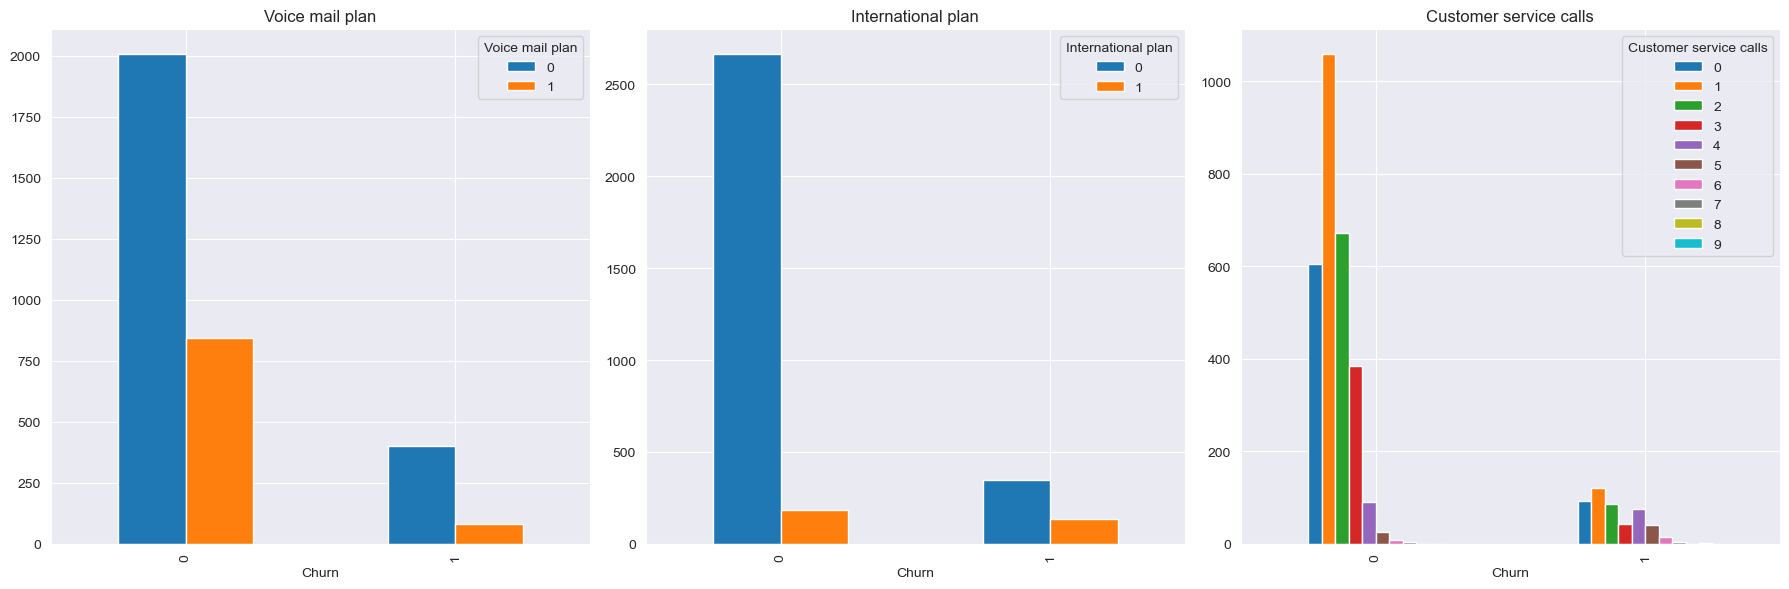

In [43]:
### Write Your code here ###
voice_mail_ct = pd.crosstab(table["Churn"], table["Voice mail plan"])
intl_plan_ct = pd.crosstab(table["Churn"], table["International plan"])
cust_serv_calls_ct = pd.crosstab(table["Churn"], table["Customer service calls"])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

voice_mail_ct.plot(kind="bar", ax=axes[0])
axes[0].set_title("Voice mail plan")

intl_plan_ct.plot(kind="bar", ax=axes[1])
axes[1].set_title("International plan")

cust_serv_calls_ct.plot(kind="bar", ax=axes[2])
axes[2].set_title("Customer service calls")

plt.tight_layout()
plt.show()

<b>Exercise 8:</b>

Add a new feature to the dataframe which will describe whether or not the user has done more than 3 service calls. Investigate how this feature describes the churn rate.

In [67]:
### Write Your code here ###
table["More than 3 service calls"] = table["Customer service calls"] > 3

print(format_title_string("More than 3 service calls", 50))
print(table[["More than 3 service calls", "Churn"]].groupby(["More than 3 service calls"]).mean())


--------------------------------------------------
------------ More than 3 service calls ------------
--------------------------------------------------

                              Churn
More than 3 service calls          
False                      0.112524
True                       0.516854
